In [1]:
# -*- coding: UTF-8 -*-
#%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import tensorflow as tf
from os import path, remove
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import StratifiedShuffleSplit
from time import time
from matplotlib import pyplot as plt
import seaborn as sns
from mylibs.jupyter_notebook_helper import show_graph, renderStatsList, renderStatsCollection, \
    renderStatsListWithLabels, renderStatsCollectionOfCrossValids, plot_res_gp, my_plot_convergence
from tensorflow.contrib import rnn
from tensorflow.contrib import learn
import shutil
from tensorflow.contrib.learn.python.learn import learn_runner
from mylibs.tf_helper import getDefaultGPUconfig
from sklearn.metrics import r2_score
from mylibs.py_helper import factors
from fastdtw import fastdtw
from collections import OrderedDict
from scipy.spatial.distance import euclidean
from statsmodels.tsa.stattools import coint
from common_33 import get_or_run_nn
from skopt.space.space import Integer, Real
from skopt import gp_minimize
from skopt.plots import plot_convergence
import pickle
import inspect
import dill
import sys

from models.model_34_price_history_autoencoder import PriceHistoryAutoencoder
from data_providers.data_provider_33_price_history_autoencoder import PriceHistoryAutoEncDataProvider
#from gp_opt.price_history_27_gp_opt import PriceHistoryGpOpt

/home/studenthp/anaconda2/envs/dis/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
dtype = tf.float32
seed = 16011984
random_state = np.random.RandomState(seed=seed)
config = getDefaultGPUconfig()
n_jobs = 1
%matplotlib inline

## Player with differencing random time series

In [7]:
orig = np.random.randn(20)*10
orig

array([  2.33951218,  -8.91800771,   5.62176219,   7.79056126,
       -17.04380591,   3.56325278,  16.91816519,  -7.9534104 ,
        -7.67460704,   7.00493637,  21.76701551,   9.77041246,
        21.20716094,  -9.04143418,   5.16173131,  16.38243775,
         7.09792821,  -2.96423684,   1.38583024,   6.98704206])

In [13]:
np.mean(orig)

3.9701123173069881

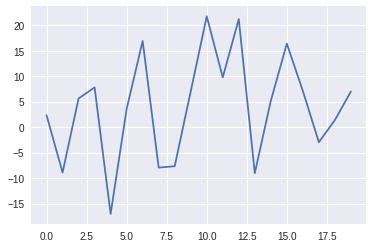

In [8]:
plt.plot(orig)

In [9]:
diff = np.diff(orig)
diff.shape

(19,)

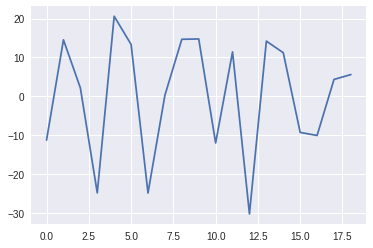

In [10]:
plt.plot(diff)

In [12]:
np.mean(diff)

0.2446068362254652

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def dickey_fuller_print(sequence):
    result = adfuller(sequence)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [16]:
dickey_fuller_print(diff)

ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	5%: -3.233
	1%: -4.332
	10%: -2.749


/home/studenthp/anaconda2/envs/dis/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [17]:
dickey_fuller_print(orig)

ADF Statistic: -1.310259
p-value: 0.624466
Critical Values:
	5%: -3.189
	1%: -4.223
	10%: -2.730


In [18]:
prev_item = orig[0]
reconstruct = [prev_item]
for item in diff:
    prev_item += item
    reconstruct.append(prev_item)

In [23]:
np.allclose(reconstruct, orig)

True